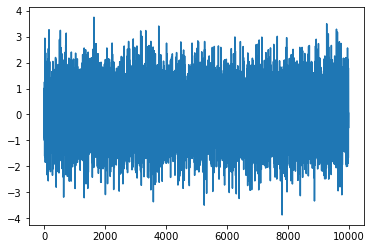

In [126]:
import numpy as np
from pymc3 import Normal
import matplotlib.pyplot as plt
%matplotlib inline

y = Normal.dist()
samples = y.random(size=10000)
plt.plot(samples)

0.016668645379621472
1.0039175455210516


(array([   8.,   78.,  489., 1427., 2694., 2831., 1723.,  626.,  110.,
          14.]),
 array([-3.86714222, -3.10597371, -2.3448052 , -1.58363669, -0.82246817,
        -0.06129966,  0.69986885,  1.46103736,  2.22220587,  2.98337438,
         3.74454289]),
 <BarContainer object of 10 artists>)

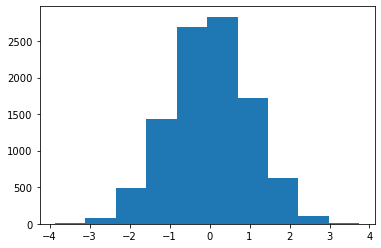

In [127]:
print(samples.mean())
print(samples.std())
plt.hist(samples)

In [128]:
import pandas as pd

In [129]:
precip = pd.read_csv("winemag-data_first150k_dev.csv")#, index_col=0, na_values='NA', delim_whitespace=True)
precip.head()

,country,points,price,province
0,France,99,2300,Bordeaux
1,US,91,2013,California
2,France,98,1900,Bordeaux
3,France,100,1400,Champagne
4,France,100,1400,Champagne


In [130]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='price'>

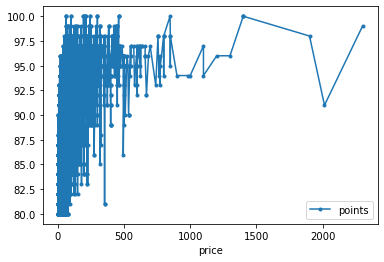

In [136]:
df = pd.DataFrame(precip)
df = df.sort_values('price')  # dict doesn't preserve order
df.plot(x='price', y='points', marker='.')

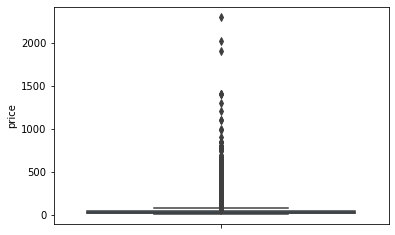

In [132]:
import seaborn as sns
k=sns.boxplot(y=df['price'])

In [133]:
# quantiles = k.quantile([0.01, 0.25, 0.5, 0.75, 0.99])

In [137]:
print("Q99")
print(df["price"].quantile(0.99))

Q99
150.0


Q99
price    65.0
Name: 0.99, dtype: float64


<AxesSubplot:xlabel='price'>

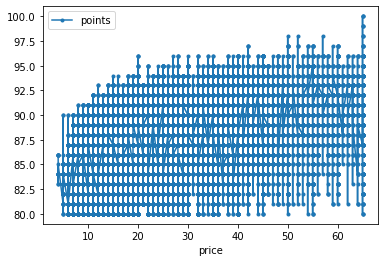

In [111]:
cols = ["price"] # one or more

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.plot(x='price', y='points', marker='.')


In [95]:
mean_points = df["points"].mean()
mean_points

87.52878066839949

In [98]:
variance_points = df["points"].var()
variance_points

9.291656549341601

array([[<AxesSubplot:title={'center':'points'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

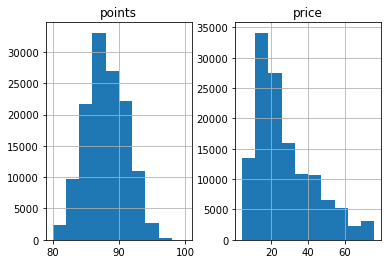

In [83]:
df.hist()

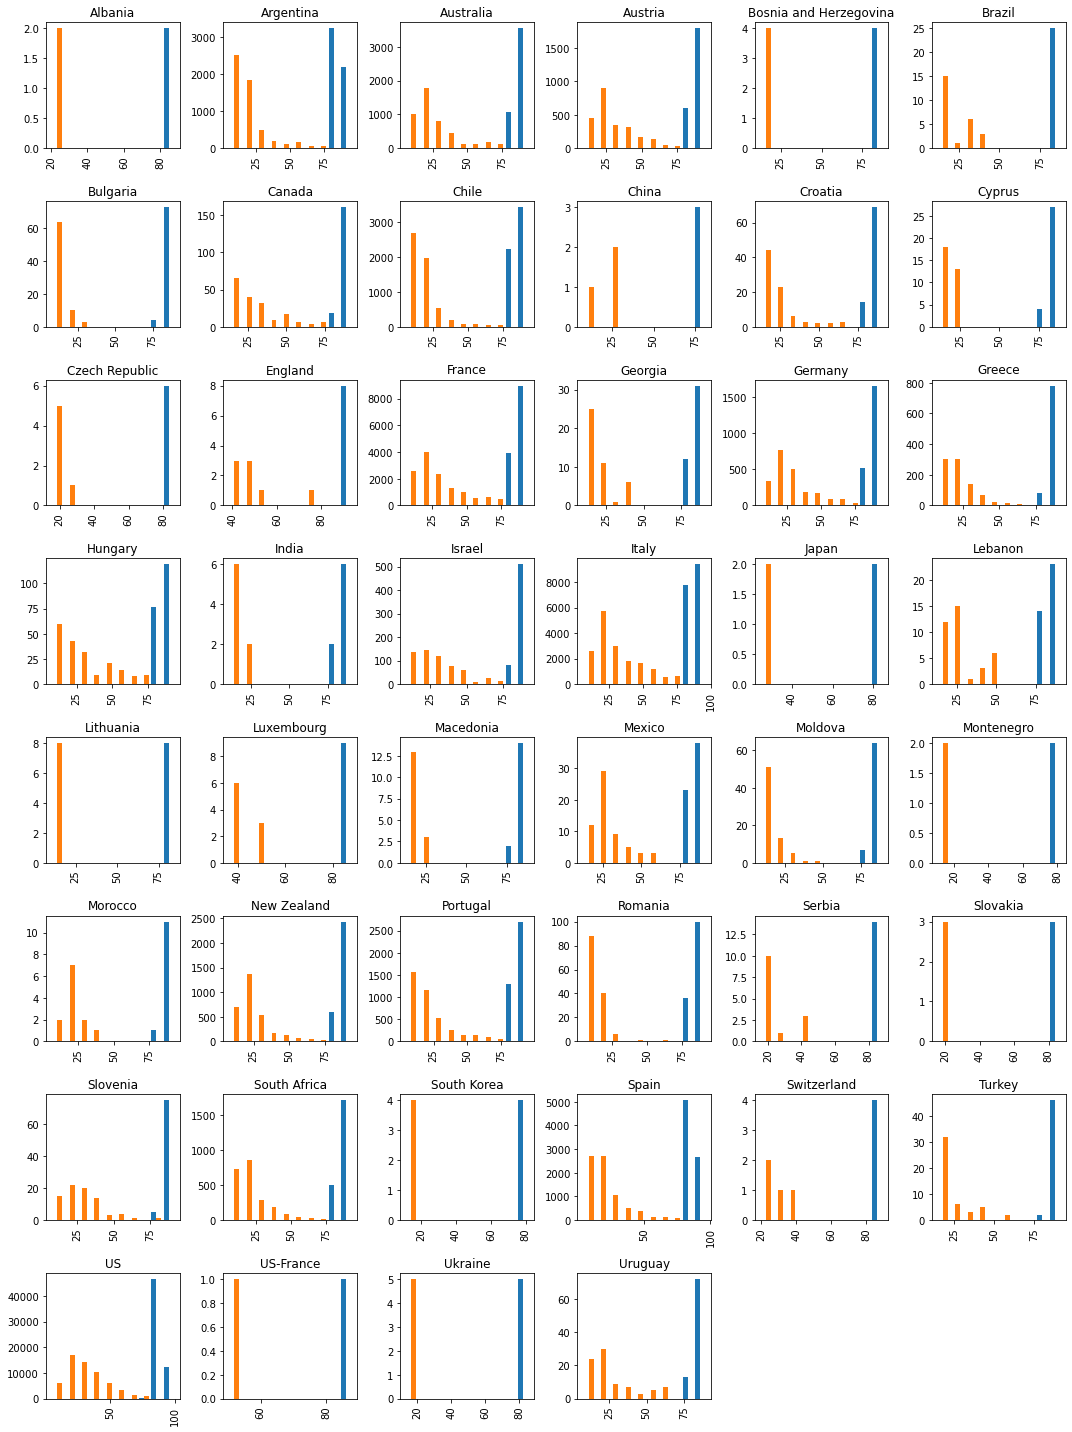

In [92]:
_ = df.hist(by="country",layout=(8, 6), figsize=(15, 20))
# plt.tight_layout()
plt.tight_layout()

country
Albania                   AxesSubplot(0.125,0.125;0.775x0.755)
Argentina                 AxesSubplot(0.125,0.125;0.775x0.755)
Australia                 AxesSubplot(0.125,0.125;0.775x0.755)
Austria                   AxesSubplot(0.125,0.125;0.775x0.755)
Bosnia and Herzegovina    AxesSubplot(0.125,0.125;0.775x0.755)
Brazil                    AxesSubplot(0.125,0.125;0.775x0.755)
Bulgaria                  AxesSubplot(0.125,0.125;0.775x0.755)
Canada                    AxesSubplot(0.125,0.125;0.775x0.755)
Chile                     AxesSubplot(0.125,0.125;0.775x0.755)
China                     AxesSubplot(0.125,0.125;0.775x0.755)
Croatia                   AxesSubplot(0.125,0.125;0.775x0.755)
Cyprus                    AxesSubplot(0.125,0.125;0.775x0.755)
Czech Republic            AxesSubplot(0.125,0.125;0.775x0.755)
England                   AxesSubplot(0.125,0.125;0.775x0.755)
France                    AxesSubplot(0.125,0.125;0.775x0.755)
Georgia                   AxesSubplot(0.125,0.1

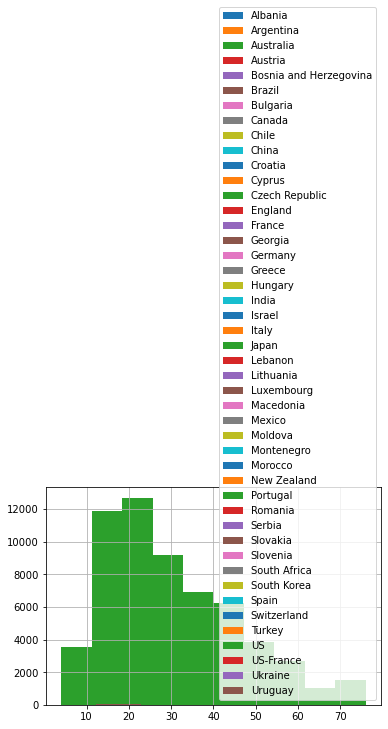

In [71]:
df.groupby('country')["price"].hist(legend = True)
# df.groupby('species')['sepal_length'].hist(alpha=0.7,label='species')
# plt.legend()

TypeError: hist() got multiple values for argument 'x'

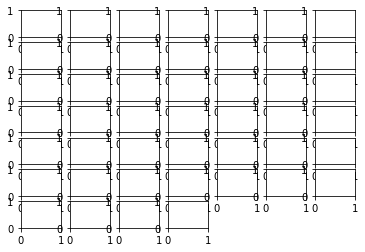

In [76]:
# df.hist(x='price',y='points',by='country')
# plt.tight_layout()

{Interval(0, 5, closed='right'): 2725.963040410739, Interval(5, 10, closed='right'): 1713.785688664072, Interval(10, 15, closed='right'): 1460.967011436356, Interval(15, 20, closed='right'): 1275.595546523101, Interval(20, 25, closed='right'): 1122.7775710223552, Interval(25, 30, closed='right'): 1042.9579737845506, Interval(30, 35, closed='right'): 980.9352756725307, Interval(35, 40, closed='right'): 968.993698565693, Interval(40, 45, closed='right'): 1063.8153992141708, Interval(45, 50, closed='right'): 1048.8755440173761, Interval(50, 55, closed='right'): 1065.3329682931505, Interval(55, 60, closed='right'): 1143.6997830449, Interval(60, 65, closed='right'): 1025.7869042697998, Interval(65, 70, closed='right'): 1271.4990716782356, Interval(70, 75, closed='right'): 966.5544680572032, Interval(75, 80, closed='right'): 1066.8943963691756, Interval(80, 85, closed='right'): 1156.4600911551681, Interval(85, 90, closed='right'): 1314.5606494445958, Interval(90, 95, closed='right'): 1217.25

/var/folders/16/2q3nw0ps4mz9nky281dlnzpm0000gn/T/ipykernel_19769/3082970613.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(6, 4))


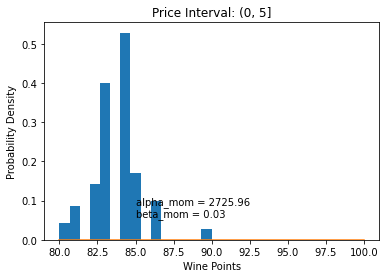

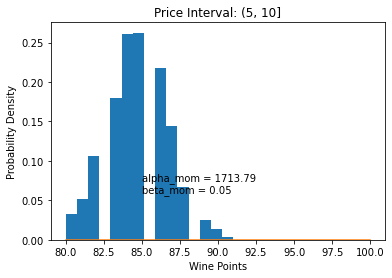

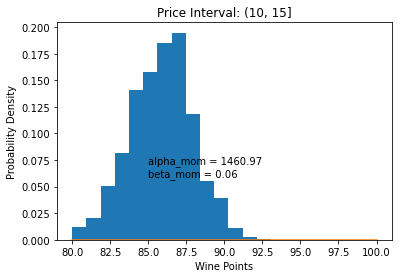

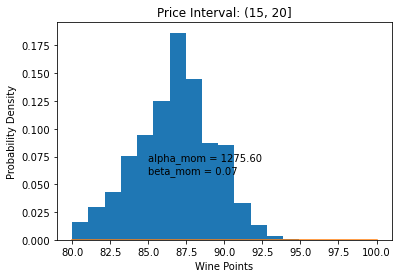

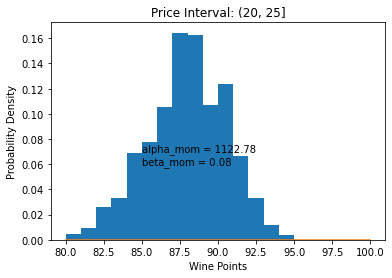

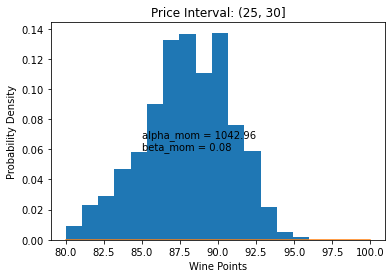

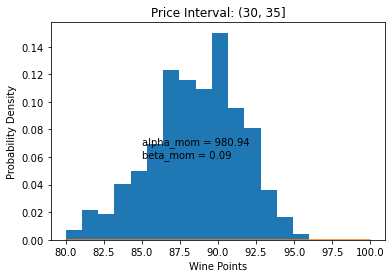

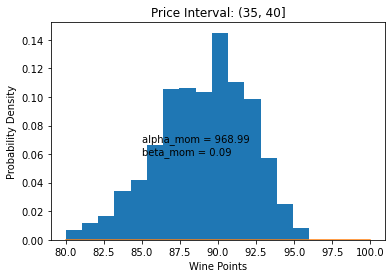

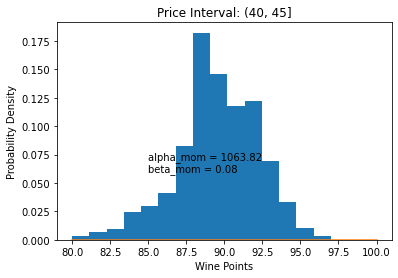

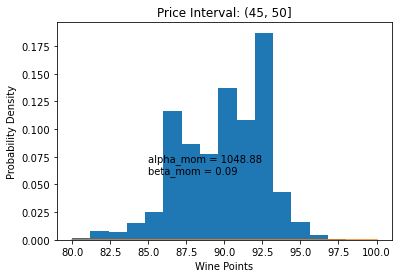

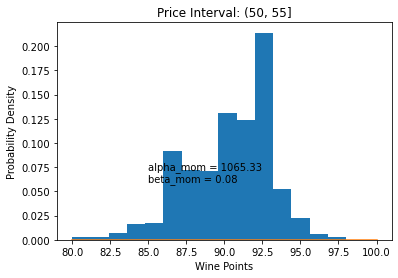

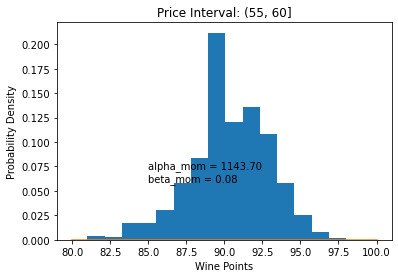

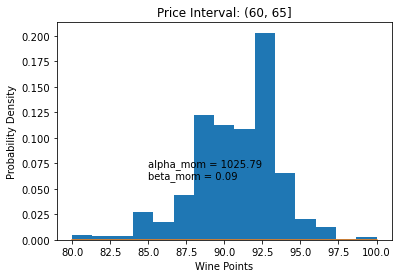

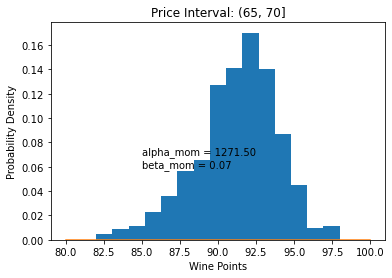

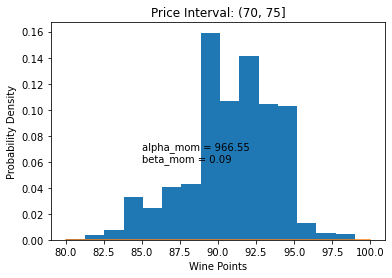

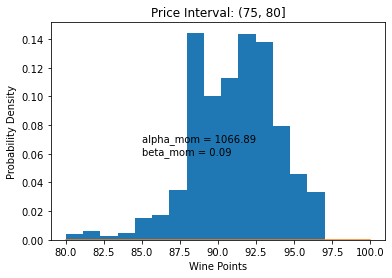

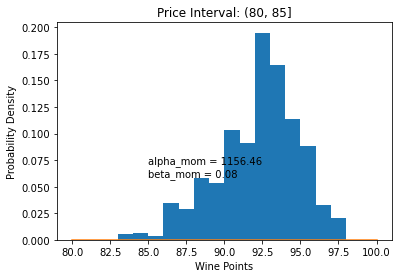

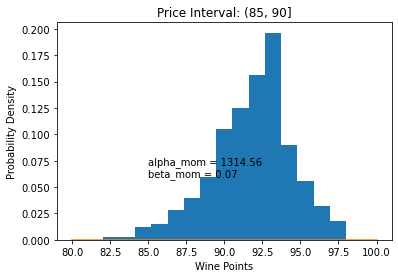

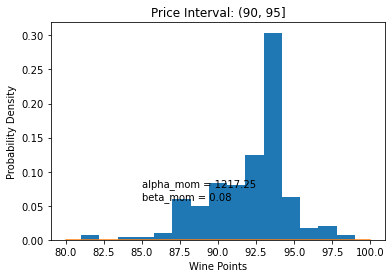

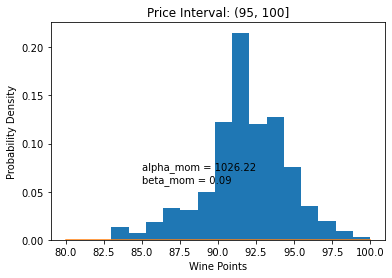

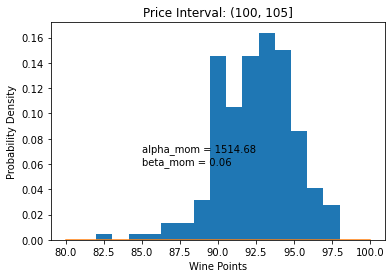

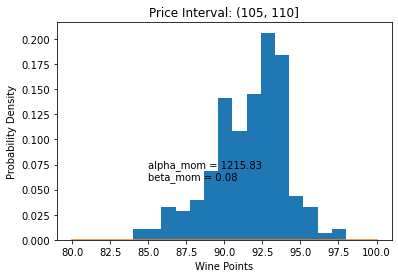

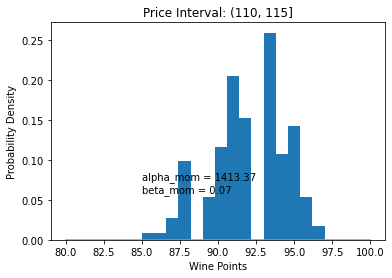

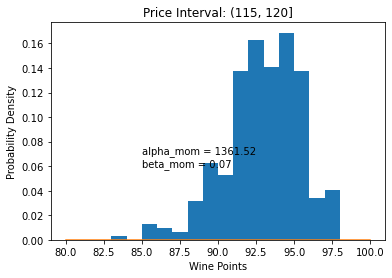

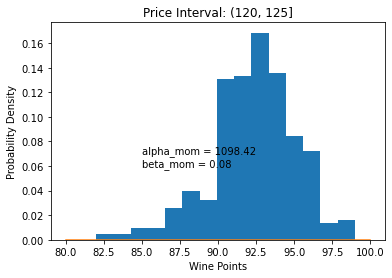

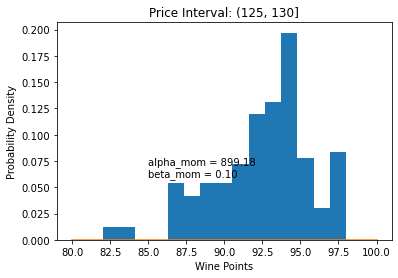

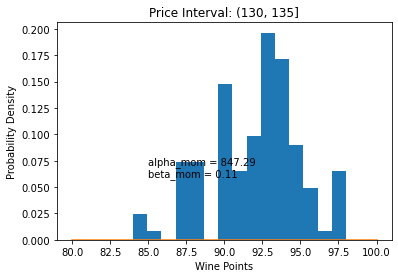

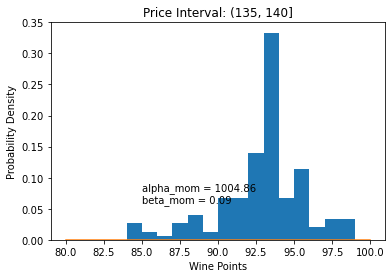

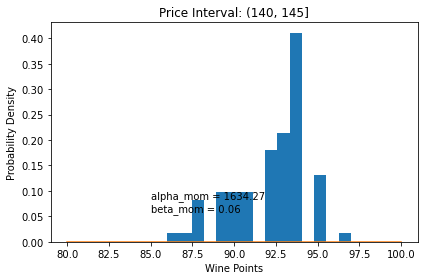

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Read the CSV into a DataFrame
wine_data = pd.read_csv('wine_data.csv')

# Group the data by price intervals (e.g., 5-unit intervals)df
wine_data['PriceInterval'] = pd.cut(wine_data['price'], bins=np.arange(0, 150, 5))

# Initialize empty dictionaries to store alpha and beta values for each interval
alpha_mom_dict = {}
beta_mom_dict = {}

# Iterate through each price interval
for interval, group in wine_data.groupby('PriceInterval'):
    mean = group['points'].mean()
    var = group['points'].var()

    # Calculate alpha and beta using MoM
    alpha_mom = (mean**2) / var
    beta_mom = var / mean
    
    # Store alpha and beta in dictionaries
    alpha_mom_dict[interval] = alpha_mom
    beta_mom_dict[interval] = beta_mom

print(alpha_mom_dict)
print(type(alpha_mom_dict))
print(beta_mom_dict)
    
# Create individual plots for each price interval
for interval, alpha in alpha_mom_dict.items():
    plt.figure(figsize=(6, 4))
    plt.title(f'Price Interval: {interval}')
    plt.hist(wine_data[wine_data['PriceInterval'] == interval]['points'], density=True, bins=15)
#         ax.plot(x, gamma.pdf(x, alpha_mom[m], beta_mom[m]))

    
    x = np.linspace(80, 100, 100)
    plt.plot(x, gamma.pdf(x, alpha_mom, beta_mom_dict[interval]))
    
    plt.annotate(f'alpha_mom = {alpha:.2f}\nbeta_mom = {beta_mom_dict[interval]:.2f}', xy=(85, 0.06))
    plt.xlabel('Wine Points')
    plt.ylabel('Probability Density')
    
plt.tight_layout()
plt.show()


In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Read the CSV into a DataFrame
wine_data = pd.read_csv('wine_data.csv')

# Group the data by price intervals (e.g., 5-unit intervals)
wine_data['PriceInterval'] = pd.cut(wine_data['price'], bins=np.arange(0, 151, 5))

# # Initialize empty dictionaries to store alpha and beta values for each interval
# alpha_mom_dict = {}
# beta_mom_dict = {}

# # Iterate through each price interval
# for interval, group in wine_data.groupby('PriceInterval'):
#     mean = group['points'].mean()
#     var = group['points'].var()

#     # Calculate alpha and beta using MoM
#     alpha_mom = (mean**2) / var
#     beta_mom = var / mean
    
#     # Store alpha and beta in dictionaries
#     alpha_mom_dict[interval] = alpha_mom
#     beta_mom_dict[interval] = beta_mom
    
# wine_data.hist(density=True, bins=20)
# alpha_0_5 = alpha_mom_dict[pd.Interval(0, 5, closed='right')]
# beta_0_5 = beta_mom_dict[pd.Interval(0, 5, closed='right')]
# plt.plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 10), alpha_0_5, beta_0_5))


0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
137230    (0.0, 5.0]
137231    (0.0, 5.0]
137232    (0.0, 5.0]
137233    (0.0, 5.0]
137234    (0.0, 5.0]
Name: price, Length: 137235, dtype: category
Categories (30, interval[int64, right]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] ... (130, 135] < (135, 140] < (140, 145] < (145, 150]]

IndexError: invalid index to scalar variable.

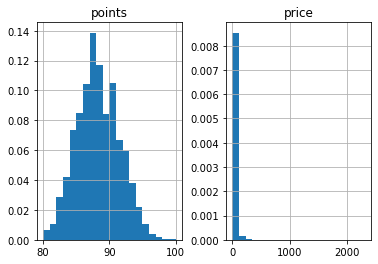

In [106]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats.distributions import gamma

wine_data.hist(density=True, bins=20)
plt.plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 10), alpha_mom[0], beta_mom[0]))

In [199]:
import pandas as pd

df = pd.read_csv("wine_data.csv")

# Create a new column with price intervals
df['price_interval'] = pd.cut(df['price'], bins=np.arange(700, 1500, 100), right=False)

# Count the points in each interval for each point value
result = pd.crosstab(index=df['points'], columns=df['price_interval'])

# Rename the columns to match your desired format
result.columns = [str(int(b)) for b in range(700,1400,100)]

# Fill NaN values with 0
result = result.fillna(0).astype(int)

# Print the resulting DataFrame
print(result)

        700  800  900  1000  1100  1200  1300
points                                       
93        2    0    0     0     0     0     0
94        1    1    2     1     1     0     0
95        2    1    0     0     0     0     0
96        1    0    0     0     0     1     1
97        0    0    0     0     1     0     0
98        3    5    0     0     0     0     0
100       0    1    0     0     0     0     0
